In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets
from sklearn.manifold import TSNE
sns.set()

In [7]:
encodings = np.load("encodings.npy")
dataset = datasets.MNIST("data", train=False)

In [10]:
tsne = TSNE(n_components=2, verbose=1, random_state=42)
z = tsne.fit_transform(encodings) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.012s...
[t-SNE] Computed neighbors for 10000 samples in 0.430s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.869583
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.838898
[t-SNE] KL divergence after 1000 iterations: 1.277354


/home/ignat/.miniconda3/envs/rl_bench/lib/python3.10/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


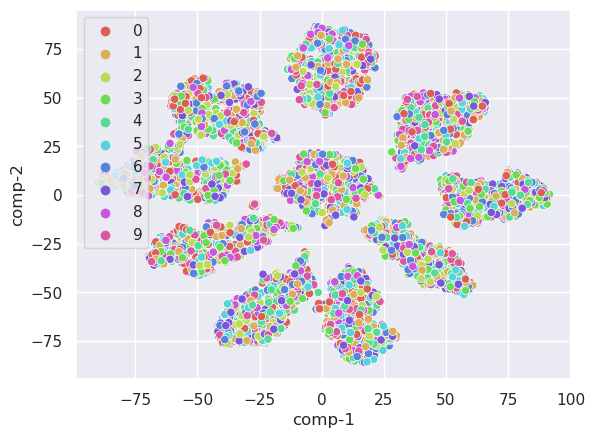

In [22]:
df = pd.DataFrame()
df["y"] = dataset.test_labels.numpy()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(data=df, x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", len(dataset.classes)))
plt.savefig("encodings.pdf")

10